### Importación de datos



In [72]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [73]:
#Creando la funcion para preparar los datos de las tiendas
def prep_tienda(df, nombre_tienda):
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
  df['Año'] = df['Fecha de Compra'].dt.year
  df['Facturacion'] = df ['Precio']
  df['Tienda'] = nombre_tienda
  return df[['Año', 'Facturacion', 'Tienda']]

In [74]:
#Aplicando la Funcion prep_tienda
t1 = prep_tienda(tienda, 'Tienda 1')
t2 = prep_tienda(tienda2, 'Tienda 2')
t3 = prep_tienda(tienda3, 'Tienda 3')
t4 = prep_tienda(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos = pd.concat([t1, t2, t3, t4])

/tmp/ipython-input-3912777997.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
/tmp/ipython-input-3912777997.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')


In [75]:
#Analizaremos por año y tienda
facturacion_ano_tienda = datos_unidos.groupby(['Año', 'Tienda'])['Facturacion'].sum().reset_index()

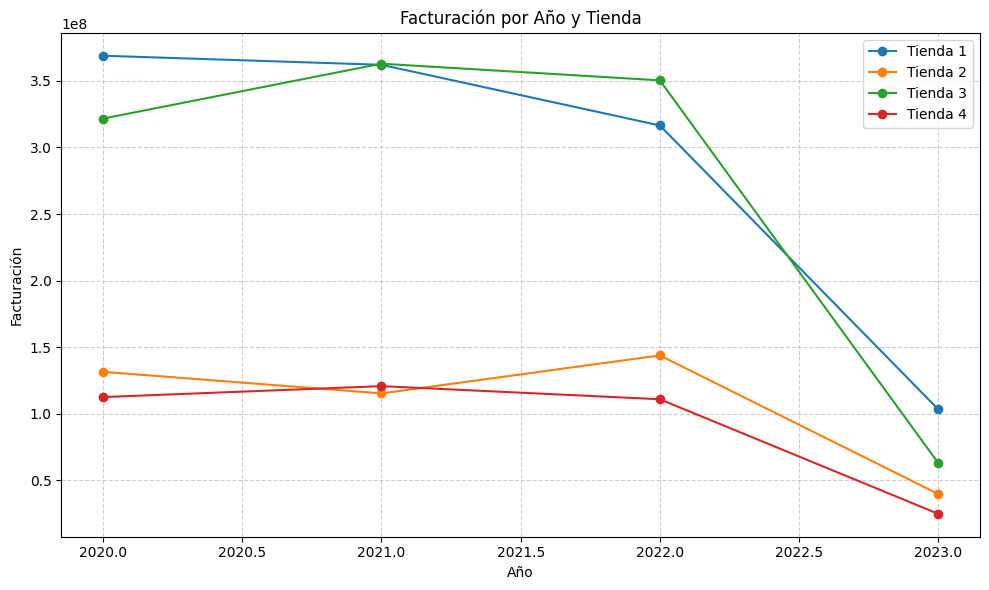

In [76]:
matp.figure(figsize=(10,6))

for tienda in facturacion_ano_tienda['Tienda'].unique():
  tienda_data = facturacion_ano_tienda[facturacion_ano_tienda['Tienda'] == tienda]
  matp.plot(tienda_data['Año'], tienda_data['Facturacion'], marker='o', label=tienda)

matp.xlabel('Año')
matp.ylabel('Facturación')
matp.title('Facturación por Año y Tienda')
matp.legend()
matp.grid(True, linestyle='--', alpha=0.6)
matp.tight_layout()
matp.show()

Segun el analisis por facturacion, podemos ver que la tienda 4 es la que menos ha facturado, a excepcion del año 2021, pero esto solo resulto en un caso en particular a lo largo de los 3 años en referencia.

# 2. Ventas por categoría

In [77]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [78]:
#Creando la funcion para preparar los datos de las tiendas por categorias
def prep_tienda_categoria(df, nombre_tienda):
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
  df['Año'] = df['Fecha de Compra'].dt.year
  df['Facturacion'] = df['Precio']
  df['Tienda'] = nombre_tienda
  df['Categoria'] = df['Categoría del Producto']
  return df[['Año', 'Categoria', 'Facturacion', 'Tienda']]

In [79]:
#Aplicamos la funcion prep_tienda_categoria
t1_cat = prep_tienda_categoria(tienda, 'Tienda 1')
t2_cat = prep_tienda_categoria(tienda2, 'Tienda 2')
t3_cat = prep_tienda_categoria(tienda3, 'Tienda 3')
t4_cat = prep_tienda_categoria(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos_cat = pd.concat([t1_cat, t2_cat, t3_cat, t4_cat])

/tmp/ipython-input-2441435221.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
/tmp/ipython-input-2441435221.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')


In [80]:
#Agrupamos los datos
df_agrupado = datos_unidos_cat.groupby(['Tienda', 'Categoria'])['Facturacion'].sum().reset_index()

#Obtenemos una lista de tiendas únicas
tiendas = df_agrupado['Tienda'].unique()

In [82]:
#Hacemos Pivot para tener tiendas como filas y categorías como columnas
df_pivot = df_agrupado.pivot(index='Tienda', columns='Categoria', values='Facturacion').fillna(0)

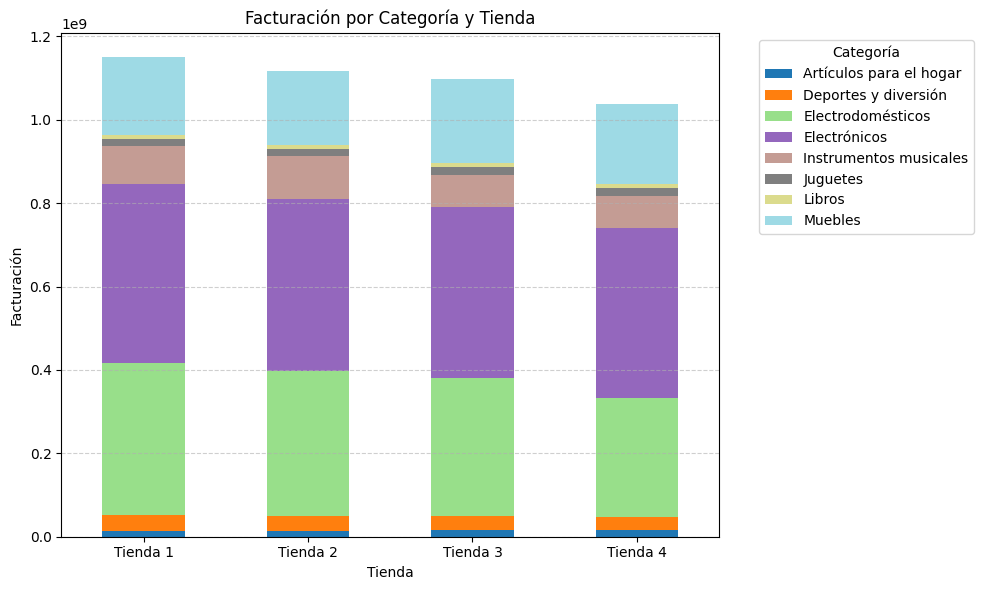

In [83]:
#Grafica de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

matp.xlabel('Tienda')
matp.ylabel('Facturación')
matp.title('Facturación por Categoría y Tienda')
matp.xticks(rotation=0)
matp.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
matp.grid(axis='y', linestyle='--', alpha=0.6)
matp.tight_layout()
matp.show()


En el grafico podemos observar que las 4 tiendas tienen una venta similar en cuanto a categorias. Las 4 tiendas tienen una venta igualada en las categorias de Articulos para el hogar, deportes y diversión, juguetes y Libros. La Tienda 2 es la mayor en venta de Instrumentos musicales. La tienda 3 es la mayor en venta de Muebles. La Tienda 1 es la mayor en electrodomesticos y electronicos. Cabe resaltar que, si bien la tienda 4 no excede a alguna tienda en cualquier categoria, es la 2da con mayor venta en electronicos.

# 3. Calificación promedio de la tienda


In [97]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [98]:
#Creando la funcion para preparar los datos de las tiendas por calificación
def prep_tienda_calif(df, nombre_tienda):
  df['Calificacion'] = df ['Calificación']
  df['Tienda'] = nombre_tienda
  return df[['Tienda', 'Calificacion']]

In [99]:
#Aplicamos la funcion prep_tienda_calif
t1_calif = prep_tienda_calif(tienda, 'Tienda 1')
t2_calif = prep_tienda_calif(tienda2, 'Tienda 2')
t3_calif = prep_tienda_calif(tienda3, 'Tienda 3')
t4_calif = prep_tienda_calif(tienda4, 'Tienda 4')

#Unimos los datos de las tiendas
datos_unidos_calif = pd.concat([t1_calif, t2_calif, t3_calif, t4_calif])

In [100]:
print(datos_unidos_calif)

        Tienda  Calificacion
0     Tienda 1             4
1     Tienda 1             1
2     Tienda 1             1
3     Tienda 1             4
4     Tienda 1             5
...        ...           ...
2353  Tienda 4             5
2354  Tienda 4             5
2355  Tienda 4             5
2356  Tienda 4             5
2357  Tienda 4             5

[9435 rows x 2 columns]


In [101]:
#Agrupamos por tienda y calculamos promedio por Año
calif_promedio = datos_unidos_calif.groupby(['Tienda'])['Calificacion'].mean().reset_index()
calif_promedio['Calificacion'] = calif_promedio['Calificacion'].round(2)

/tmp/ipython-input-479702372.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Calificacion', data=calif_promedio, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Tienda 1'),
  Text(1, 0, 'Tienda 2'),
  Text(2, 0, 'Tienda 3'),
  Text(3, 0, 'Tienda 4')])

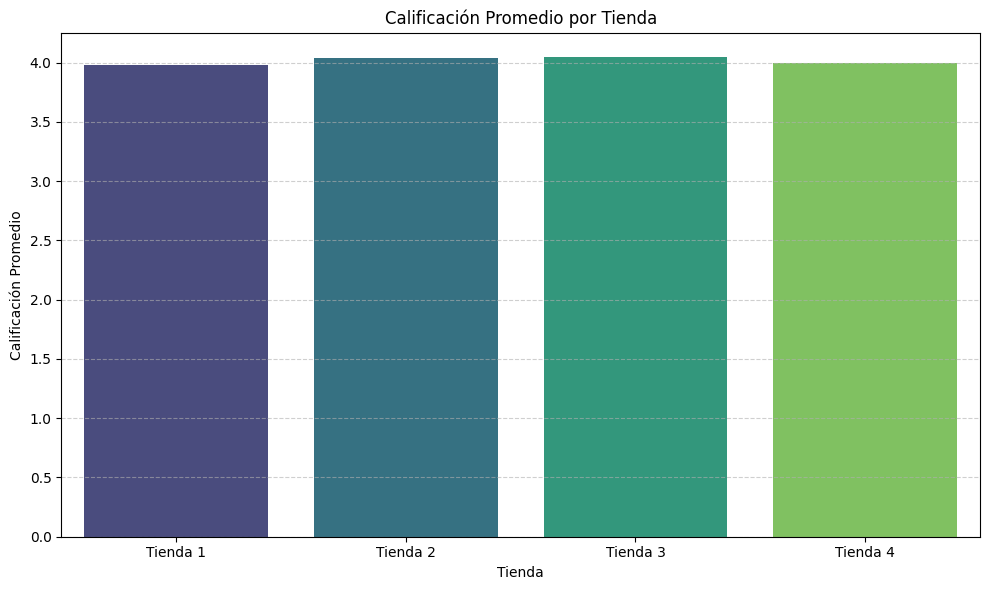

In [103]:
#Graficamos

import seaborn as sns

matp.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Calificacion', data=calif_promedio, palette='viridis')
matp.xlabel('Tienda')
matp.ylabel('Calificación Promedio')
matp.title('Calificación Promedio por Tienda')
matp.grid(axis='y', linestyle='--', alpha=0.6)
matp.tight_layout()
matp.xticks(rotation=0)


Podemos observar que en promedio las Tiendas 2 y 3 son la que tiene una mayor calificación. La Tienda con menor calificación es la Tienda 1

# 4. Productos más y menos vendidos

In [83]:
import pandas as pd
import matplotlib.pyplot as matp

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# 5. Envío promedio por tienda